# Reading the data set and generating the statistical description #

In [3]:
import pandas as pd

# 1. Import a data set from a CSV file
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv')
data.head()


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
# 2. Generate the statistical description of all the features
description = data.describe(include='all')

print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

# Creating parameter visualizations #

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



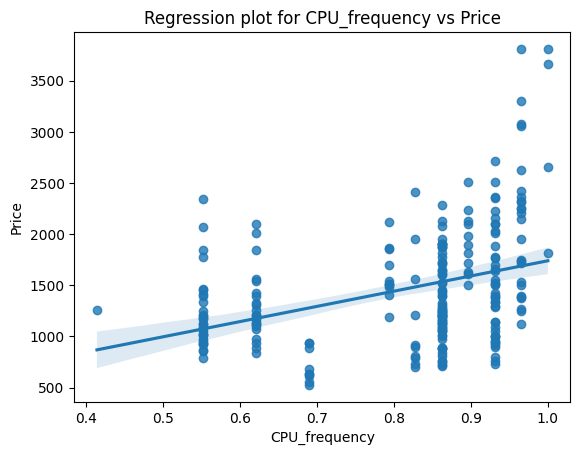

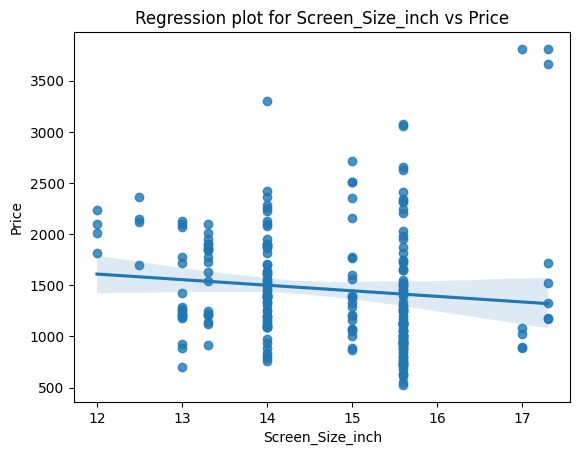

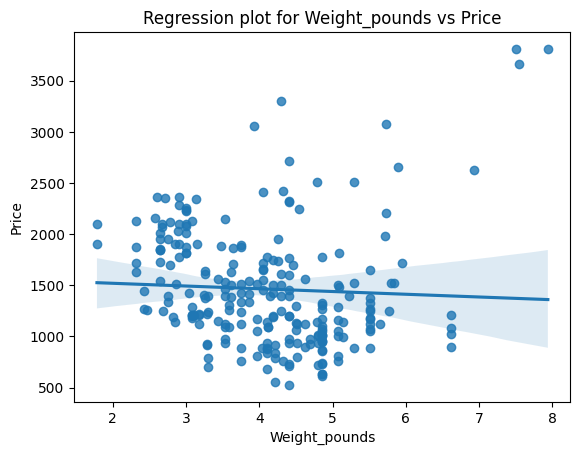

In [6]:
# 1. Create regression plots

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()


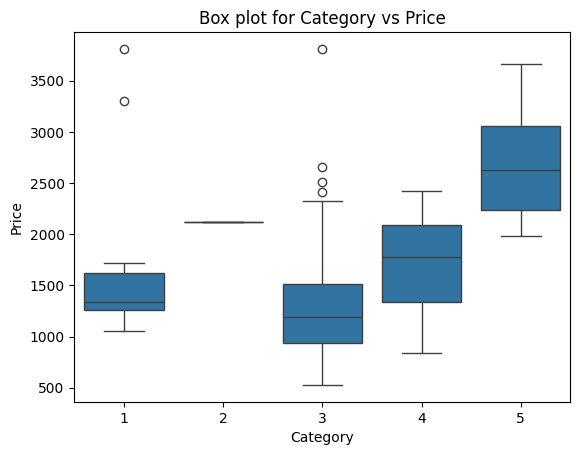

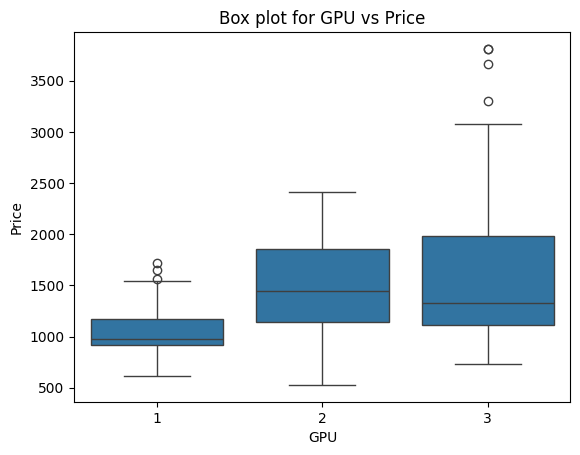

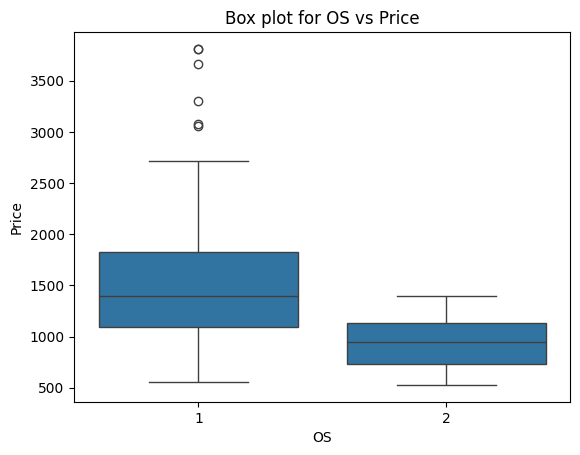

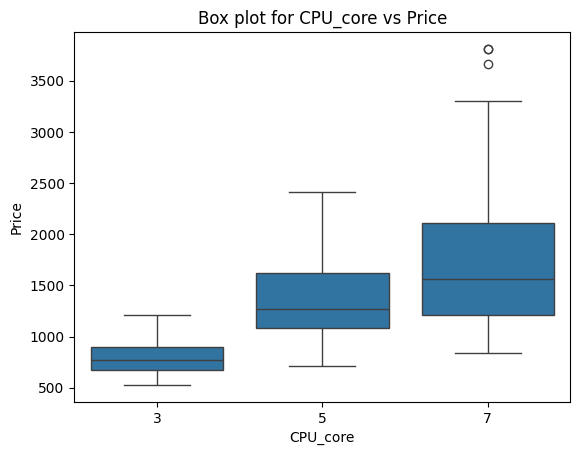

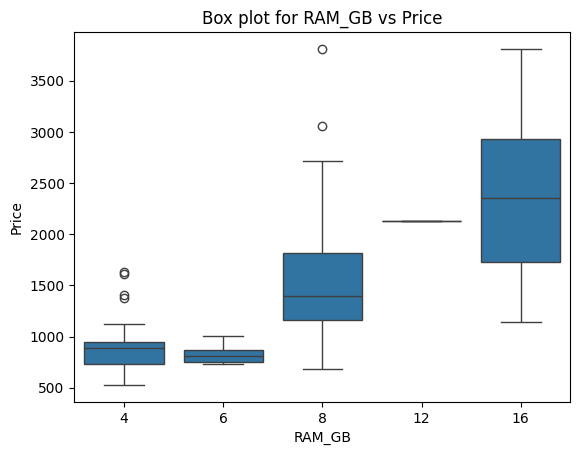

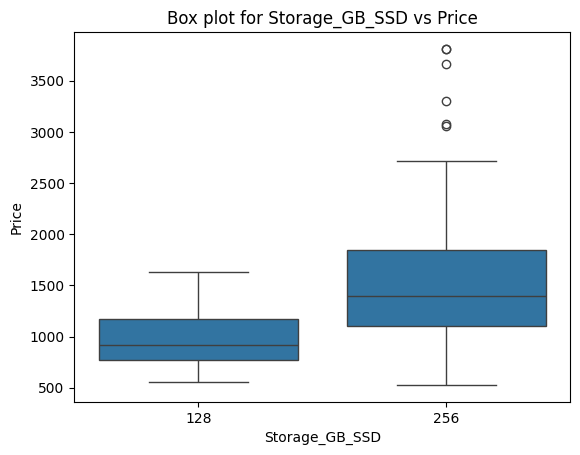

In [7]:
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# Evaluate dependence #

In [8]:
import numpy as np
from scipy.stats import pearsonr

In [11]:
# Select numerical attributes
numerical_attributes = data.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')
correlation_values



Unnamed: 0.1        0.321933
Unnamed: 0          0.321933
Category            0.286243
GPU                 0.288298
OS                 -0.221730
CPU_core            0.459398
Screen_Size_inch   -0.110644
CPU_frequency       0.366666
RAM_GB              0.549297
Storage_GB_SSD      0.243421
Weight_pounds      -0.050312
Screen-Full_HD     -0.021075
Screen-IPS_panel    0.021075
Name: Price, dtype: float64

In [14]:
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], data['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
results_df

,Attribute,Correlation Value,Pearson Coefficient,P-value
Unnamed: 0.1,Unnamed: 0.1,0.321933,0.321933,3.851058e-07
Unnamed: 0,Unnamed: 0,0.321933,0.321933,3.851058e-07
Category,Category,0.286243,0.286243,7.225696e-06
GPU,GPU,0.288298,0.288298,6.166950e-06
OS,OS,-0.221730,-0.221730,5.696643e-04
CPU_core,CPU_core,0.459398,0.459398,7.912950e-14
Screen_Size_inch,Screen_Size_inch,-0.110644,-0.110644,8.853398e-02
CPU_frequency,CPU_frequency,0.366666,0.366666,5.502463e-09
RAM_GB,RAM_GB,0.549297,0.549297,3.681561e-20
Storage_GB_SSD,Storage_GB_SSD,0.243421,0.243421,1.489892e-04


# Grouping and pivots #

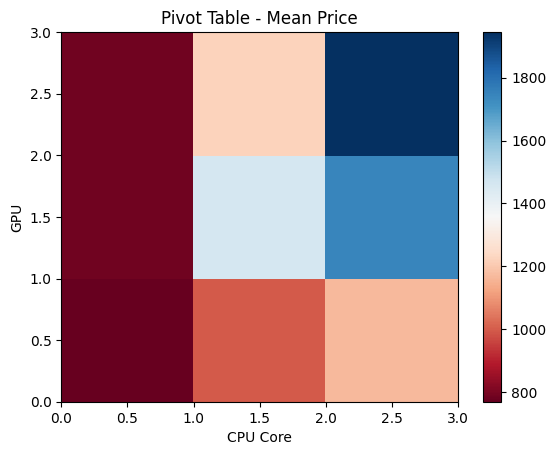

In [15]:
# Group the attributes
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(data, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()